In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import matplotlib as plt

## INTENTO 4

In [2]:
df4 = pd.read_csv('../df_cleaned.csv')

In [3]:
dfbesttry = pd.read_csv('../Nacho/try11_data.csv')

In [4]:
df4.drop(columns='Unnamed: 0',inplace=True)

In [5]:
df4

,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,0,51,1,1,125.0,213.0,0.0,2.0,125.0,1.0,1.4,1.0,1.0,3.0,0.0
1,1,54,1,3,120.0,237.0,0.0,0.0,150.0,1.0,1.5,NaN,NaN,7.0,2.0
2,2,63,1,4,140.0,0.0,NaN,2.0,149.0,0.0,2.0,1.0,NaN,NaN,2.0
3,3,52,0,2,140.0,NaN,0.0,0.0,140.0,0.0,0.0,NaN,NaN,NaN,0.0
4,4,55,1,4,140.0,217.0,0.0,0.0,111.0,1.0,5.6,3.0,0.0,7.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,179,54,1,4,200.0,198.0,0.0,0.0,142.0,1.0,2.0,2.0,NaN,NaN,NaN
912,180,55,1,2,110.0,214.0,1.0,1.0,180.0,0.0,NaN,NaN,NaN,NaN,NaN
913,181,67,1,3,152.0,212.0,0.0,2.0,150.0,0.0,0.8,2.0,0.0,7.0,NaN
914,182,59,1,1,170.0,288.0,0.0,2.0,159.0,0.0,0.2,2.0,0.0,7.0,NaN


In [6]:
df4.drop('index', axis=1, inplace=True)

In [7]:
df4.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,51,1,1,125.0,213.0,0.0,2.0,125.0,1.0,1.4,1.0,1.0,3.0,0.0
1,54,1,3,120.0,237.0,0.0,0.0,150.0,1.0,1.5,NaN,NaN,7.0,2.0
2,63,1,4,140.0,0.0,NaN,2.0,149.0,0.0,2.0,1.0,NaN,NaN,2.0
3,52,0,2,140.0,NaN,0.0,0.0,140.0,0.0,0.0,NaN,NaN,NaN,0.0
4,55,1,4,140.0,217.0,0.0,0.0,111.0,1.0,5.6,3.0,0.0,7.0,3.0


In [8]:
media_thalach = df4['thalach'].mean()

# Rellenar los NaN con la media calculada
df4['thalach'].fillna(value=media_thalach, inplace=True)

# Mostrar los primeros registros para verificar el resultado
print(df4[['thalach']].head())

   thalach
0    125.0
1    150.0
2    149.0
3    140.0
4    111.0


In [9]:
# Suponiendo que 'df' es tu DataFrame y 'df' es tu DataFrame final
# Convertir '<NA>' a NaN
df4.replace('<NA>', np.nan, inplace=True)

# Obtener columnas numéricas y categóricas
numeric_cols4 = ['age', 'oldpeak']
categorical_cols4 = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'label']

# Imputación para variables numéricas (usando la mediana)
numeric_imputer3 = SimpleImputer(strategy='mean')
df4[numeric_cols4] = numeric_imputer3.fit_transform(df4[numeric_cols4])

# Imputación para variables categóricas (usando la moda)
categorical_imputer3 = SimpleImputer(strategy='most_frequent')
df4[categorical_cols4] = categorical_imputer3.fit_transform(df4[categorical_cols4])

# Verificar que ya no hay valores faltantes
print(df4.isnull().sum())

# El DataFrame 'df' ahora contiene los valores imputados


age           0
sex           0
cp            0
trestbps     59
chol         30
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
ca            0
thal        483
label         0
dtype: int64


In [10]:
# Función para categorizar los valores de chol
def categorizar_chol(valor):
    if valor == 0 or pd.isnull(valor):  
        return 0
    elif valor < 200:
        return 1
    elif 200 <= valor <= 239:
        return 2
    else:  # valor >= 240
        return 3

# Aplicar la función al DataFrame
df4['chol'] = df4['chol'].apply(categorizar_chol)

# Mostrar los primeros registros para verificar el resultado
print(df4['chol'].head())


0    2
1    2
2    0
3    0
4    2
Name: chol, dtype: int64


In [11]:
def sust_thal(valor):
    if pd.isnull(valor):
        return 0
    else:
        return valor

df4['thal'] = df4['thal'].apply(sust_thal)
print(df4['thal'].head())

0    3.0
1    7.0
2    0.0
3    0.0
4    7.0
Name: thal, dtype: float64


In [12]:
def categorizar_trestbps(valor):
    if pd.isnull(valor):
        return 0
    elif valor < 120:
        return 1
    elif 120 <= valor <= 129:
        return 2
    else:  # valor >= 130
        return 3


df4['trestbps'] = df4['trestbps'].apply(categorizar_trestbps)

# Mostrar los primeros registros para verificar el resultado
print(df4['trestbps'].head())


0    2
1    2
2    3
3    3
4    3
Name: trestbps, dtype: int64


In [13]:
def categorizar_thalach_correcta(edad, sexo, thalach):
    # Categorías basadas en la tabla para hombres y mujeres
    # Los rangos se ajustan para reflejar el límite superior inclusivo
    categorias_hombres = [(86, 200), (70, 85), (62, 69), (60, 61)]  # Inadecuado, Normal, Bueno, Excelente
    categorias_mujeres = [(96, 200), (78, 95), (72, 77), (70, 71)]
    
    # Seleccionar los límites según el sexo
    limites = categorias_hombres if sexo == 1 else categorias_mujeres
    
    # Asignar categorías según la edad
    if edad < 30:
        rango_edad = 0
    elif edad <= 39:
        rango_edad = 1
    elif edad <= 49:
        rango_edad = 2
    else:  # edad >= 50
        rango_edad = 3
    
    # Verificar si thalach es NaN
    if pd.isnull(thalach):
        return 5  # Podemos asignar un 5 para valores NaN o no clasificables
    
    # Determinar la categoría basada en el valor de thalach
    # Devolveremos la categoría basada en el límite que se cruce primero, desde la mejor a la peor
    for i, (limite_inferior, limite_superior) in enumerate(limites):
        if limite_inferior <= thalach <= limite_superior:
            return 4 - i if rango_edad == i else 1  # Excelente si el rango de edad coincide, sino Inadecuado
    
    return 1  # Por defecto, si no encaja en ningún otro rango, se considera Inadecuado

# Aplicar la función actualizada al DataFrame
df4['thalach_cat'] = df4.apply(lambda fila: categorizar_thalach_correcta(fila['age'], fila['sex'], fila['thalach']), axis=1)

# Mostrar los primeros registros para verificar el resultado
print(df4[['age', 'sex', 'thalach', 'thalach_cat']].head())


    age  sex  thalach  thalach_cat
0  51.0  1.0    125.0            1
1  54.0  1.0    150.0            1
2  63.0  1.0    149.0            1
3  52.0  0.0    140.0            1
4  55.0  1.0    111.0            1


In [14]:
df4.isnull().sum()

age            0
sex            0
cp             0
trestbps       0
chol           0
fbs            0
restecg        0
thalach        0
exang          0
oldpeak        0
slope          0
ca             0
thal           0
label          0
thalach_cat    0
dtype: int64

In [15]:
from sklearn.preprocessing import MinMaxScaler

# Crear un objeto StandardScaler
scaler3 = MinMaxScaler()

# Lista de columnas a estandarizar
columns_to_scale3 = ['age','oldpeak']

# Ajustar el escalador solo a las columnas especificadas y transformarlas
df4[columns_to_scale3] = scaler3.fit_transform(df4[columns_to_scale3])


In [16]:
from sklearn.preprocessing import OrdinalEncoder

# Inicializar el codificador ordinal
ordinal_encoder = OrdinalEncoder()

# Variables para codificación ordinal
ordinal_vars = ["slope", "ca", "thal", "restecg"]

# Aplicar codificación ordinal
df4[ordinal_vars] = ordinal_encoder.fit_transform(df4[ordinal_vars])

df4.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label,thalach_cat
0,0.469388,1.0,1.0,2,2,0.0,2.0,125.0,1.0,0.454545,0.0,1.0,1.0,0.0,1
1,0.530612,1.0,3.0,2,2,0.0,0.0,150.0,1.0,0.465909,1.0,0.0,3.0,2.0,1
2,0.714286,1.0,4.0,3,0,0.0,2.0,149.0,0.0,0.522727,0.0,0.0,0.0,2.0,1
3,0.489796,0.0,2.0,3,0,0.0,0.0,140.0,0.0,0.295455,1.0,0.0,0.0,0.0,1
4,0.551020,1.0,4.0,3,2,0.0,0.0,111.0,1.0,0.931818,2.0,0.0,3.0,3.0,1


In [17]:
# Aplicar codificación de conteo
for var in ["chol", "thalach_cat", "trestbps", "cp"]:
    df4[var + '_count'] = df4[var].map(df4[var].value_counts())

df4.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label,thalach_cat,chol_count,thalach_cat_count,trestbps_count,cp_count
0,0.469388,1.0,1.0,2,2,0.0,2.0,125.0,1.0,0.454545,0.0,1.0,1.0,0.0,1,230,913,211,44
1,0.530612,1.0,3.0,2,2,0.0,0.0,150.0,1.0,0.465909,1.0,0.0,3.0,2.0,1,230,913,211,204
2,0.714286,1.0,4.0,3,0,0.0,2.0,149.0,0.0,0.522727,0.0,0.0,0.0,2.0,1,201,913,485,495
3,0.489796,0.0,2.0,3,0,0.0,0.0,140.0,0.0,0.295455,1.0,0.0,0.0,0.0,1,201,913,485,173
4,0.551020,1.0,4.0,3,2,0.0,0.0,111.0,1.0,0.931818,2.0,0.0,3.0,3.0,1,230,913,485,495


In [18]:
df4

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label,thalach_cat,chol_count,thalach_cat_count,trestbps_count,cp_count
0,0.469388,1.0,1.0,2,2,0.0,2.0,125.000000,1.0,0.454545,0.0,1.0,1.0,0.0,1,230,913,211,44
1,0.530612,1.0,3.0,2,2,0.0,0.0,150.000000,1.0,0.465909,1.0,0.0,3.0,2.0,1,230,913,211,204
2,0.714286,1.0,4.0,3,0,0.0,2.0,149.000000,0.0,0.522727,0.0,0.0,0.0,2.0,1,201,913,485,495
3,0.489796,0.0,2.0,3,0,0.0,0.0,140.000000,0.0,0.295455,1.0,0.0,0.0,0.0,1,201,913,485,173
4,0.551020,1.0,4.0,3,2,0.0,0.0,111.000000,1.0,0.931818,2.0,0.0,3.0,3.0,1,230,913,485,495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,0.530612,1.0,4.0,3,1,0.0,0.0,142.000000,1.0,0.522727,1.0,0.0,0.0,0.0,1,128,913,485,495
912,0.551020,1.0,2.0,1,2,1.0,1.0,180.000000,0.0,0.394986,1.0,0.0,0.0,0.0,1,230,913,161,173
913,0.795918,1.0,3.0,3,2,0.0,2.0,150.000000,0.0,0.386364,1.0,0.0,3.0,0.0,1,230,913,485,204
914,0.632653,1.0,1.0,3,3,0.0,2.0,159.000000,0.0,0.318182,1.0,0.0,3.0,0.0,1,357,913,485,44


In [19]:
train_end4 = df4[0:732]
test_end4 = df4[(916-184):]

In [20]:
train_end4.isna().sum()

age                  0
sex                  0
cp                   0
trestbps             0
chol                 0
fbs                  0
restecg              0
thalach              0
exang                0
oldpeak              0
slope                0
ca                   0
thal                 0
label                0
thalach_cat          0
chol_count           0
thalach_cat_count    0
trestbps_count       0
cp_count             0
dtype: int64

In [21]:
test_end4.isna().sum()

age                  0
sex                  0
cp                   0
trestbps             0
chol                 0
fbs                  0
restecg              0
thalach              0
exang                0
oldpeak              0
slope                0
ca                   0
thal                 0
label                0
thalach_cat          0
chol_count           0
thalach_cat_count    0
trestbps_count       0
cp_count             0
dtype: int64

In [22]:
train_end4['label'].value_counts()

0.0    327
1.0    156
2.0    108
3.0    107
4.0     34
Name: label, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split

X4 = train_end4.drop('label', axis=1)  # Todas las columnas excepto la columna objetivo
Y4 = train_end4['label']

# Dividimos el conjunto de entrenamiento en nuevo entrenamiento y validación (85% entrenamiento, 15% validación del conjunto de entrenamiento original)
X4_train, X4_val, Y4_train, Y4_val = train_test_split(X4, Y4, test_size=0.125, random_state=42)



In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC

# Espacio de parámetros para cada modelo
model_params3 = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7, 9]
        }
    },
    'Random_Forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [10, 50, 100],
            'max_depth': [None, 10, 20, 30]
        }
    },
    'Logistic_Regression': {
        'model': LogisticRegression(),
        'params': {
            'C': [0.1, 1, 10]
        }
    },
    'SVM': {
        'model': SVC(),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['rbf', 'linear']
        }
    }
}

# Nota: La regresión lineal no tiene hiperparámetros que suelan ajustarse en el sentido tradicional, por lo que no se incluye en el Grid Search.


In [25]:
from sklearn.model_selection import train_test_split

# Supongamos que ya has aplicado SMOTE a tus datos de entrenamiento y los tienes en X1_train_smote, Y1_train_smote

# Ejemplo con KNN
grid_search3 = GridSearchCV(model_params3['KNN']['model'], model_params3['KNN']['params'], cv=5, return_train_score=False)
grid_search3.fit(X4_train, Y4_train)

# Resultados
(grid_search3.best_params_ ,grid_search3.best_score_)

({'n_neighbors': 9}, 0.4734375)

In [26]:
from sklearn.ensemble import RandomForestClassifier

# Para demostrar el proceso, ejecutaremos GridSearchCV solo para Random Forest debido a limitaciones del entorno de ejecución
model_to_run4 = 'Random_Forest'
model4 = model_params3[model_to_run4]['model']
params4 = model_params3[model_to_run4]['params']

grid_search4 = GridSearchCV(model4, params4, cv=5, return_train_score=False)
grid_search4.fit(X4_train, Y4_train)

# Mejores parámetros y mejor puntuación - como ejemplo, esto no se ejecutará, solo para ilustración
best_params4 = grid_search4.best_params_
best_score4 = grid_search4.best_score_
(best_params4, best_score4)



({'max_depth': 30, 'n_estimators': 100}, 0.521875)

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Asegúrate de definir model_params correctamente como se mostró anteriormente

# Corregimos aquí para ejecutar GridSearchCV para la Regresión Logística
model_to_run5 = 'Logistic_Regression'
model5 = model_params3[model_to_run5]['model']  # Usamos model_to_run2
params5 = model_params3[model_to_run5]['params']

# Crear el objeto GridSearchCV para Regresión Logística
grid_search5 = GridSearchCV(model5, params5, cv=5, return_train_score=False)

# Reemplaza X1_train_smote, Y1_train_smote con tus datos reales de entrenamiento
grid_search5.fit(X4_train, Y4_train)

# Obtener los mejores parámetros y la mejor puntuación
best_params5 = grid_search5.best_params_
best_score5 = grid_search5.best_score_

(best_params5, best_score5)


c:\Users\Pacotm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Pacotm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

({'C': 0.1}, 0.5046875)

In [28]:
from sklearn.ensemble import RandomForestClassifier

# Definir el modelo de Random Forest con los parámetros seleccionados
rf_model4 = RandomForestClassifier(max_depth=30, n_estimators=100, random_state=42)

# Entrenar el modelo con tus datos de entrenamiento
rf_model4.fit(X4_train, Y4_train)

# El modelo ahora está entrenado y listo para hacer predicciones o para ser evaluado en tu conjunto de validación o prueba


RandomForestClassifier(max_depth=30, random_state=42)

In [29]:
from sklearn.metrics import accuracy_score

# Hacer predicciones en el conjunto de validación
Y4_val_pred = rf_model4.predict(X4_val)

# Calcular la precisión
accuracy = accuracy_score(Y4_val, Y4_val_pred)

print(f"La precisión del modelo en el conjunto de validación es: {accuracy}")


La precisión del modelo en el conjunto de validación es: 0.5217391304347826


In [30]:
# Excluyendo la columna 'label'
test_end4_sin_label = test_end4.drop('label', axis=1)

# Ahora puedes hacer predicciones con el conjunto de datos preparado
predicciones4 = rf_model4.predict(test_end4_sin_label)

# Y también obtener las probabilidades de cada clase si lo necesitas
probabilidades4 = rf_model4.predict_proba(test_end4_sin_label)



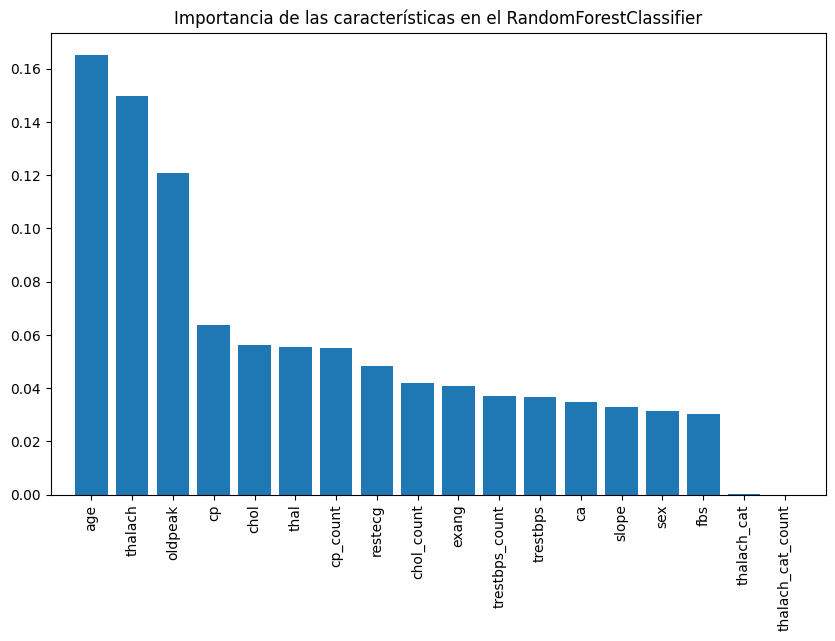

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Obtener la importancia de las características
importancias = rf_model4.feature_importances_

# Ordenar las importancias en orden descendente
indices = np.argsort(importancias)[::-1]

# Nombres de las características ordenadas por importancia
nombres_caracteristicas = [test_end4_sin_label.columns[i] for i in indices]

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.title("Importancia de las características en el RandomForestClassifier")
plt.bar(range(test_end4_sin_label.shape[1]), importancias[indices], align="center")
plt.xticks(range(test_end4_sin_label.shape[1]), nombres_caracteristicas, rotation=90)
plt.xlim([-1, test_end4_sin_label.shape[1]])
plt.show()


In [32]:
# Copiar el DataFrame 'test_end' a 'predicted_df'
predicted_df4 = test_end4.copy()

# Actualizar la columna 'label' con las predicciones
predicted_df4['label'] = predicciones4

# Mostrar las primeras filas del nuevo DataFrame para verificar
print(predicted_df4.head())



          age  sex   cp  trestbps  chol  fbs  restecg  thalach  exang  \
732  0.591837  1.0  4.0         3     1  0.0      2.0    119.0    1.0   
733  0.489796  1.0  2.0         3     1  0.0      0.0    165.0    0.0   
734  0.408163  1.0  2.0         1     0  0.0      0.0    100.0    0.0   
735  0.693878  1.0  4.0         1     0  0.0      0.0    128.0    1.0   
736  0.469388  1.0  3.0         1     1  0.0      0.0    123.0    0.0   

      oldpeak  slope   ca  thal  label  thalach_cat  chol_count  \
732  0.636364    2.0  0.0   0.0    2.0            1         128   
733  0.295455    1.0  0.0   0.0    0.0            1         128   
734  0.295455    1.0  0.0   0.0    0.0            1         201   
735  0.579545    2.0  0.0   0.0    2.0            1         201   
736  0.363636    0.0  0.0   1.0    1.0            1         128   

     thalach_cat_count  trestbps_count  cp_count  
732                913             485       495  
733                913             485       173  
734  

In [33]:
predicted_df4

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label,thalach_cat,chol_count,thalach_cat_count,trestbps_count,cp_count
732,0.591837,1.0,4.0,3,1,0.0,2.0,119.000000,1.0,0.636364,2.0,0.0,0.0,2.0,1,128,913,485,495
733,0.489796,1.0,2.0,3,1,0.0,0.0,165.000000,0.0,0.295455,1.0,0.0,0.0,0.0,1,128,913,485,173
734,0.408163,1.0,2.0,1,0,0.0,0.0,100.000000,0.0,0.295455,1.0,0.0,0.0,0.0,1,201,913,161,173
735,0.693878,1.0,4.0,1,0,0.0,0.0,128.000000,1.0,0.579545,2.0,0.0,0.0,2.0,1,201,913,161,495
736,0.469388,1.0,3.0,1,1,0.0,0.0,123.000000,0.0,0.363636,0.0,0.0,1.0,1.0,1,128,913,161,204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,0.530612,1.0,4.0,3,1,0.0,0.0,142.000000,1.0,0.522727,1.0,0.0,0.0,2.0,1,128,913,485,495
912,0.551020,1.0,2.0,1,2,1.0,1.0,180.000000,0.0,0.394986,1.0,0.0,0.0,0.0,1,230,913,161,173
913,0.795918,1.0,3.0,3,2,0.0,2.0,150.000000,0.0,0.386364,1.0,0.0,3.0,0.0,1,230,913,485,204
914,0.632653,1.0,1.0,3,3,0.0,2.0,159.000000,0.0,0.318182,1.0,0.0,3.0,0.0,1,357,913,485,44


In [34]:
predicted_df4['label'].value_counts()

0.0    96
1.0    37
2.0    28
3.0    23
Name: label, dtype: int64

In [35]:
# Restablecer el índice de predicted_df para que comience en 0 y luego sumar 1 para comenzar desde 1
predicted_df4.reset_index(drop=True, inplace=True)
predicted_df4['ID'] = predicted_df4.index 

# Seleccionar las columnas 'ID' y 'label' para el nuevo DataFrame df_randomf
df_randomf3 = predicted_df4[['ID', 'label']]

# Guardar df_randomf en un archivo CSV sin el índice de pandas
df_randomf3.to_csv('try50_data.csv', index=False)


In [36]:
df46best = pd.read_csv('try46best_data.csv')
dfactualtry = pd.read_csv('try50_data.csv')

In [37]:
difference = df46best['label'].compare(dfactualtry['label'])
difference = difference[difference['self']!= difference ['other']]

print(difference)

Empty DataFrame
Columns: [self, other]
Index: []


In [38]:
total_diferencias = len(difference)

print(f"Total de entradas diferentes: {total_diferencias}")

Total de entradas diferentes: 0
